# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best) “off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [29]:
import numpy as np
import cvxpy as cp
import math
import matplotlib.pyplot as plt

### Subsection 1

In [30]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, y):
    red = X[y == 1]
    blue = X[y == -1]
    plt.scatter(red[:, 0], red[:, 1], c = 'r')
    plt.scatter(blue[:, 0], blue[:, 1], c = 'b')

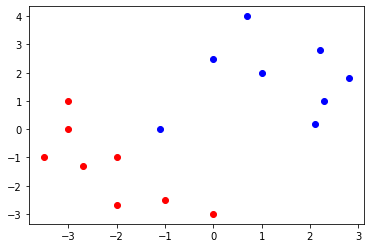

In [31]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here.**

**Note: You cannot use sklearn SVM functions here.**

In [65]:
# Write your code here
def solver(X, y, status="hard", C=0, do_print=True):
    n = 2
    m = len(y)
    w = cp.Variable(n)
    b = cp.Variable()
    psi = cp.Variable(m)
    if status=="hard":
        objective = cp.Minimize(0.5 * cp.square(cp.norm(w)))
        constraints = [cp.multiply(y, X @ w + b) >= 1]
    else:
        objective = cp.Minimize(0.5 * cp.square(cp.norm(w)) + C * cp.sum(psi))
        constraints = [cp.multiply(y, X @ w + b) >= 1 - psi, psi >= 0]
    prob = cp.Problem(objective, constraints)
    prob.solve()
    if do_print:
        print('w value: ', w.value, '\nb value: ', b.value)
    return w, b

In [96]:
def plotBoundaries(X, y, w, b, plot_type="all"):
    d1_min = np.min([X[:, 0]])
    d1_max = np.max([X[:, 0]])

    # Line form: (-a[0] * x - b ) / a[1]
    d2_at_mind1 = (-w[0]*d1_min - b ) / w[1]
    d2_at_maxd1 = (-w[0]*d1_max - b ) / w[1]
    sup_up_at_mind1 = (-w[0]*d1_min - b + 1 ) / w[1]
    sup_up_at_maxd1 = (-w[0]*d1_max - b + 1 ) / w[1]
    sup_dn_at_mind1 = (-w[0]*d1_min - b - 1 ) / w[1]
    sup_dn_at_maxd1 = (-w[0]*d1_max - b - 1 ) / w[1]

    # Plot the clusters!
    if plot_type=="all":
        plot_points(X, y)
    else:
        sup_vec_x = []
        sup_vec_y = []
        for i, x in enumerate(X):
            if y[i]*(np.dot(w, x)+b)-1 <= 1e-15:
                sup_vec_x.append(x)
                sup_vec_y.append(y[i])
        sup_vec_x = np.array(sup_vec_x)
        sup_vec_y = np.array(sup_vec_y)
        if sup_vec_x.shape[0] != 0:
            plot_points(sup_vec_x, sup_vec_y)
        else:
            print("No Support vectors found! :(")
    plt.plot([d1_min,d1_max],[d2_at_mind1 ,d2_at_maxd1],color='black')
    plt.plot([d1_min,d1_max],[sup_up_at_mind1,sup_up_at_maxd1],'-.',color='blue')
    plt.plot([d1_min,d1_max],[sup_dn_at_mind1,sup_dn_at_maxd1],'-.',color='blue')
    plt.ylim([np.floor(np.min([X[:,1]])) - 0.5,np.ceil(np.max([X[:,1]])) + 0.5])
    plt.show()

In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

### SVM classifier with Hard margin

w value:  [-1.73913043 -1.30434783] 
b value:  -2.9130434780347696


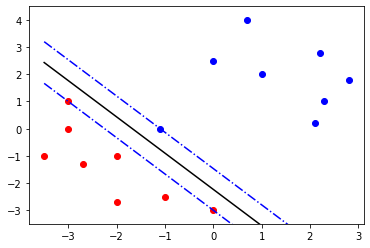

In [97]:
w, b = solver(X, y)
plotBoundaries(X, y, w.value, b.value)

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here.**

### SVM classifier with only support vectors

w value:  [-1.73913043 -1.30434783] 
b value:  -2.9130434780347696


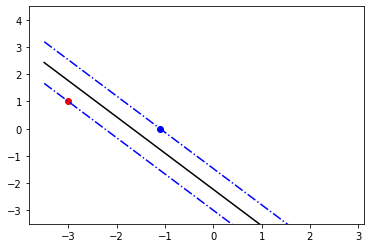

In [98]:
# Write your code here
w, b = solver(X, y)
plotBoundaries(X, y, w.value, b.value, plot_type="support")

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

**Answer** </br>
As the points added are far from the classifiers previous decision boundary, they don't contribute to the trianing of the classifier and can't become the support vectors in this dataset. Therefore, the new points added neither change the decision boundary nor the margin (made by support vectors).

#### Dataset with extra points

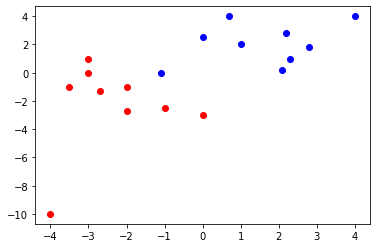

In [99]:
# Re-create the Synthetic Data by adding the points and visualize the points
X_extra = np.append(X, [[-4, -10], [4, 4]], axis=0)
y_extra = np.append(y, [1, -1], axis=0)
plot_points(X_extra, y_extra)

### SVM classifier for modified dataset

w value:  [-1.73913043 -1.30434783] 
b value:  -2.9130434780347696


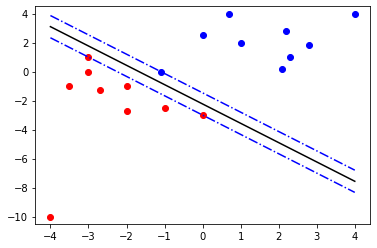

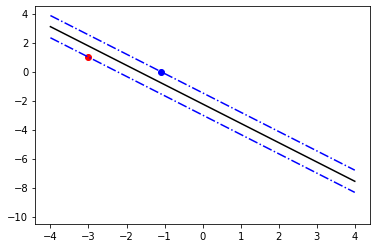

In [100]:
# Solve for the decision boundary using this modified dataset
w, b = solver(X, y)
plotBoundaries(X_extra, y_extra, w.value, b.value)
plotBoundaries(X_extra, y_extra, w.value, b.value, plot_type="support")

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell.**

**Answer** </br>
We observe that as the C parameter increases the margins become tighter and tighter allowing less number of datapoints between the decision boundary and the margins. </br>
**Reason:** The C parameter is used in the regularization parameter. It specifies how much we want to avoid misclassifying each training example. So, for large values of C, the optimization will choose a smaller-margin decision boundary if that boundary does a better job of getting all the training points classified correctly. Conversely, a small value of C will cause the optimizer to look for a larger-margin separating boundary, even if it misclassifies more points.

### SVM classifier with Soft margin

In [123]:
def remove_support(X, y, w, b):
    non_sup_vec_x = []
    non_sup_vec_y = []
    for i, x in enumerate(X):
        if not y[i]*(np.dot(w, x)+b)-1 <= 1e-6:
            non_sup_vec_x.append(x)
            non_sup_vec_y.append(y[i])
    non_sup_vec_x = np.array(non_sup_vec_x)
    non_sup_vec_y = np.array(non_sup_vec_y)
    return non_sup_vec_x, non_sup_vec_y

w value:  [-0.22506809 -0.19858949] 
b value:  0.013672204267370152


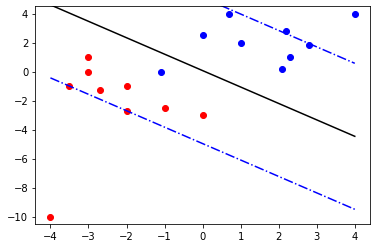

In [124]:
# Write your code here for C= 0.01
w, b = solver(X_extra, y_extra, status="soft", C = 0.01)
plotBoundaries(X_extra, y_extra, w.value, b.value)

w value:  [-0.38493724 -0.35146444] 
b value:  -0.12133891201898916


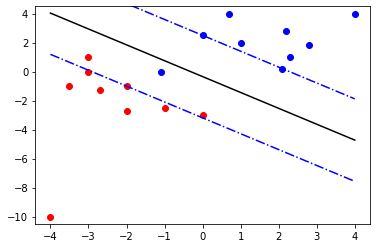

In [125]:
# Write your code here for C= 0.1
w, b = solver(X_extra, y_extra, status="soft", C = 0.1)
plotBoundaries(X_extra, y_extra, w.value, b.value)

w value:  [-1.73913043 -1.30434783] 
b value:  -2.9130434782869634


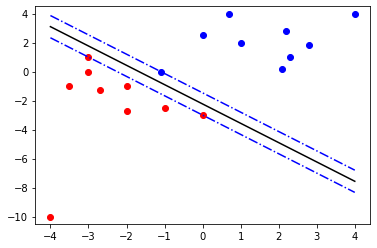

In [126]:
# Write your code here for C= 3
w, b = solver(X_extra, y_extra, status="soft", C = 3)
plotBoundaries(X_extra, y_extra, w.value, b.value)

w value:  [-1.73913043 -1.30434783] 
b value:  -2.9130434783574235


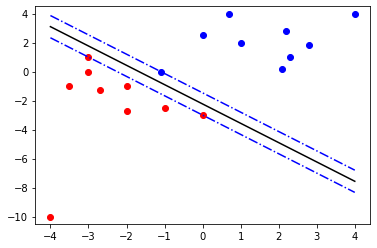

In [127]:
# Write your code here for C= 10
w, b = solver(X_extra, y_extra, status="soft", C = 10)
plotBoundaries(X_extra, y_extra, w.value, b.value)

w value:  [-1.73913044 -1.30434783] 
b value:  -2.9130434786825745


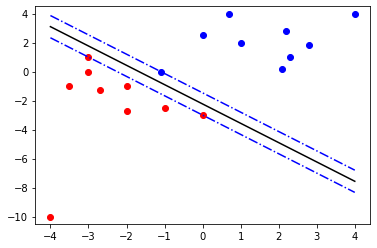

In [128]:
# Write your code here for C= 100
w, b = solver(X_extra, y_extra, status="soft", C = 100)
plotBoundaries(X_extra, y_extra, w.value, b.value)

### SVM classifier C=100, after removing the support vectors

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

**Answer** </br>
Since the value of C is very large, it doesn't tolerate many misclassifications. Now since SVM are only dependent on the support vectors, removing them will surely change the margin. Here, observe that both the boundary and margin changes when we remove the suppoort vectors. We can observe that initally one of the blue point was very close to the red points, making the decision boundary much closer to the red points. Since this blue point was a support vector, after its removal the red and blue points were much more linearly seperable and thus we get a decesion boundary which is more centrally located between the two classes and has a larger margin.

w value:  [-0.38493724 -0.35146444] 
b value:  -0.12133891214351254


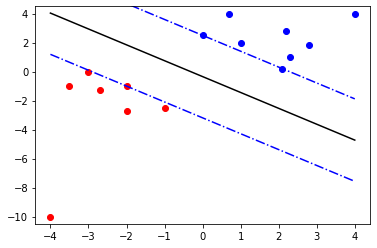

In [129]:
# Write your Code here
w, b = solver(X_extra, y_extra, status="soft", C = 100, do_print=False)
X_new, y_new = remove_support(X_extra, y_extra, w.value, b.value)
w, b = solver(X_new, y_new, status="soft", C = 100)
plotBoundaries(X_new, y_new, w.value, b.value)

### Subsection 2

In [130]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

You should consider upgrading via the '/Users/chief-blackhood/virtualenv/SMAI/bin/python -m pip install --upgrade pip' command.
--2021-12-01 17:05:03--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  15.3MB/s    in 0.6s    

2021-12-01 17:05:05 (15.3 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-12-01 17:05:05--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gz

In [131]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import pandas as pd

In [132]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [3]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(images_train, labels_train, test_size=0.9, random_state=42, stratify=labels_train)

In [5]:
print(X_train.shape, y_train.shape)

(6000, 784) (6000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [16]:
def performace_measure(y_test, y_pred):
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Classification Report\n", metrics.classification_report(y_test, y_pred))

    print("Precision:",metrics.precision_score(y_test, y_pred, average='macro', zero_division=1))
    print("Recall:",metrics.recall_score(y_test, y_pred, average='macro', zero_division=1))
    print("F1 score:",metrics.f1_score(y_test, y_pred, average='macro', zero_division=1))
    df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index = [i for i in "0123456789"],
                      columns = [i for i in "0123456789"])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt='g')

##### Default SVM

Accuracy: 0.9099
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.95      0.98      0.96      1135
           2       0.90      0.88      0.89      1032
           3       0.87      0.91      0.89      1010
           4       0.90      0.93      0.92       982
           5       0.88      0.85      0.86       892
           6       0.95      0.94      0.94       958
           7       0.92      0.91      0.91      1028
           8       0.89      0.83      0.86       974
           9       0.90      0.87      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Precision: 0.908904914450733
Recall: 0.9084488158016388
F1 score: 0.9083421073272762


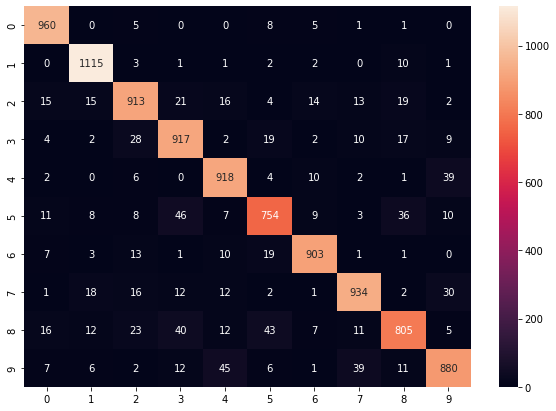

In [114]:
my_svm = SVC(kernel='linear')
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(images_test)
performace_measure(labels_test, y_pred)

##### SVM with linear kernel, C = 0.1

Accuracy: 0.9099
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.95      0.98      0.96      1135
           2       0.90      0.88      0.89      1032
           3       0.87      0.91      0.89      1010
           4       0.90      0.93      0.92       982
           5       0.88      0.85      0.86       892
           6       0.95      0.94      0.94       958
           7       0.92      0.91      0.91      1028
           8       0.89      0.83      0.86       974
           9       0.90      0.87      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Precision: 0.908904914450733
Recall: 0.9084488158016388
F1 score: 0.9083421073272762


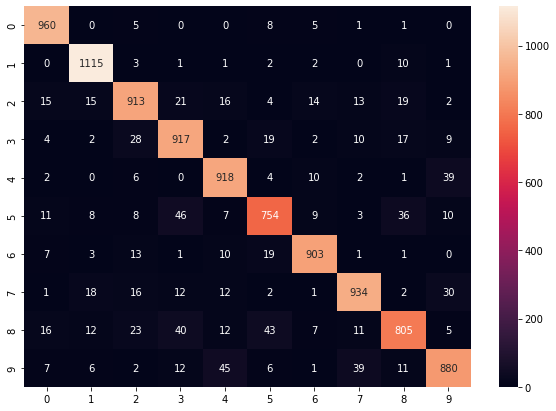

In [111]:
my_svm = SVC(kernel='linear', C=0.1)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(images_test)
performace_measure(labels_test, y_pred)

##### SVM with linear kernel, C = 3

Accuracy: 0.9099
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.95      0.98      0.96      1135
           2       0.90      0.88      0.89      1032
           3       0.87      0.91      0.89      1010
           4       0.90      0.93      0.92       982
           5       0.88      0.85      0.86       892
           6       0.95      0.94      0.94       958
           7       0.92      0.91      0.91      1028
           8       0.89      0.83      0.86       974
           9       0.90      0.87      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Precision: 0.908904914450733
Recall: 0.9084488158016388
F1 score: 0.9083421073272762


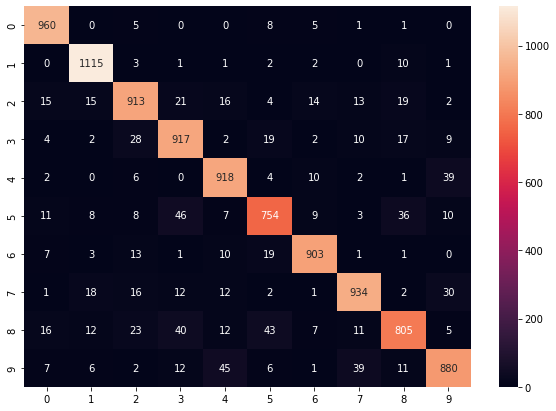

In [112]:
my_svm = SVC(kernel='linear', C=3)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(images_test)
performace_measure(labels_test, y_pred)

##### SVM with linear kernel, C = 10

Accuracy: 0.9099
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.95      0.98      0.96      1135
           2       0.90      0.88      0.89      1032
           3       0.87      0.91      0.89      1010
           4       0.90      0.93      0.92       982
           5       0.88      0.85      0.86       892
           6       0.95      0.94      0.94       958
           7       0.92      0.91      0.91      1028
           8       0.89      0.83      0.86       974
           9       0.90      0.87      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Precision: 0.908904914450733
Recall: 0.9084488158016388
F1 score: 0.9083421073272762


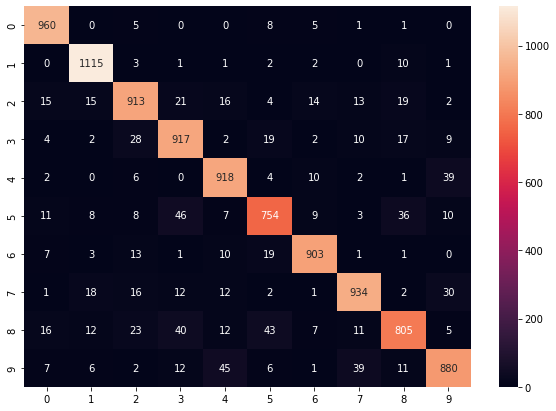

In [116]:
my_svm = SVC(kernel='linear', C=10)
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(images_test)
performace_measure(labels_test, y_pred)

##### SVM with ploy kernel

Accuracy: 0.9434
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.90      0.99      0.94      1135
           2       0.96      0.92      0.94      1032
           3       0.94      0.94      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.92      0.93      0.93       892
           6       0.96      0.96      0.96       958
           7       0.96      0.93      0.94      1028
           8       0.95      0.92      0.93       974
           9       0.95      0.92      0.94      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

Precision: 0.9442684954384616
Recall: 0.9428579394720318
F1 score: 0.9432704197835472


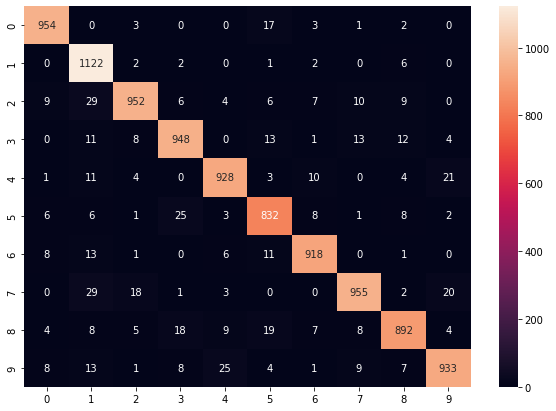

In [10]:
my_svm = SVC(kernel='poly')
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(images_test)
performace_measure(labels_test, y_pred)

##### SVM with rbf kernel, C = 0.1, gamma = scale

Accuracy: 0.9226
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.91      0.92      0.92       982
           5       0.90      0.90      0.90       892
           6       0.94      0.95      0.95       958
           7       0.94      0.90      0.92      1028
           8       0.91      0.87      0.89       974
           9       0.88      0.90      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Precision: 0.9219972932108265
Recall: 0.9218437732896273
F1 score: 0.9217258891002805


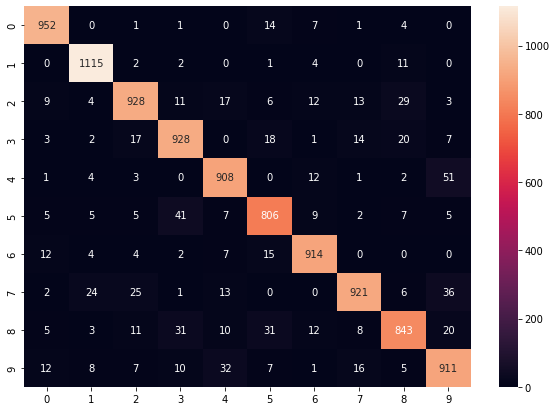

In [11]:
my_svm = SVC(kernel='rbf', C=0.1, gamma='scale')
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(images_test)
performace_measure(labels_test, y_pred)

##### SVM with rbf kernel, C = 3, gamma = scale

Accuracy: 0.9635
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.94      0.97      0.96      1010
           4       0.96      0.96      0.96       982
           5       0.97      0.94      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Precision: 0.9635240456269406
Recall: 0.9630146269766973
F1 score: 0.9631926552541529


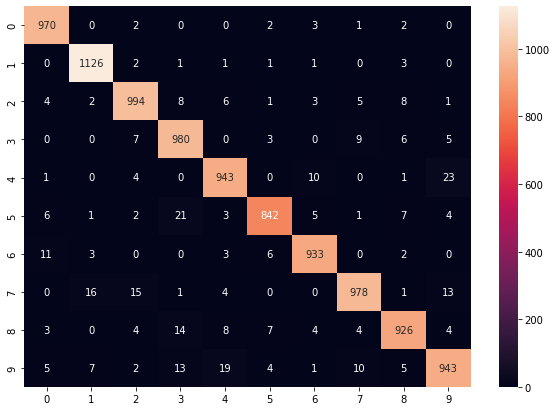

In [12]:
my_svm = SVC(kernel='rbf', C=3, gamma='scale')
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(images_test)
performace_measure(labels_test, y_pred)

##### SVM with rbf kernel, C = 10, gamma = scale

Accuracy: 0.9634
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.96      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.97      0.94      0.95       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.93      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Precision: 0.96330304479002
Recall: 0.9628252732832309
F1 score: 0.9629853728709117


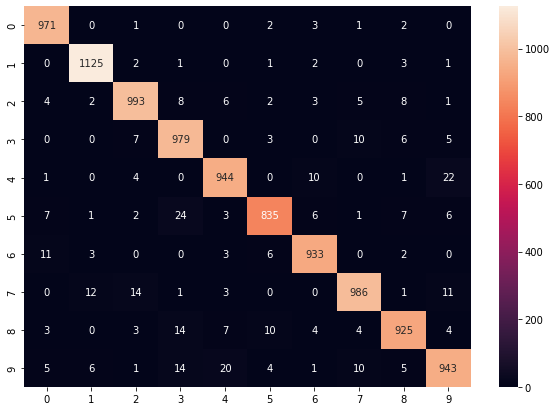

In [13]:
my_svm = SVC(kernel='rbf', C=10, gamma='scale')
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(images_test)
performace_measure(labels_test, y_pred)

##### SVM with rbf kernel, C = 0.1, gamma = auto

Accuracy: 0.1135
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000

Precision: 0.91135
Recall: 0.1
F1 score: 0.0203861697350696


/Users/chief-blackhood/virtualenv/SMAI/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chief-blackhood/virtualenv/SMAI/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chief-blackhood/virtualenv/SMAI/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

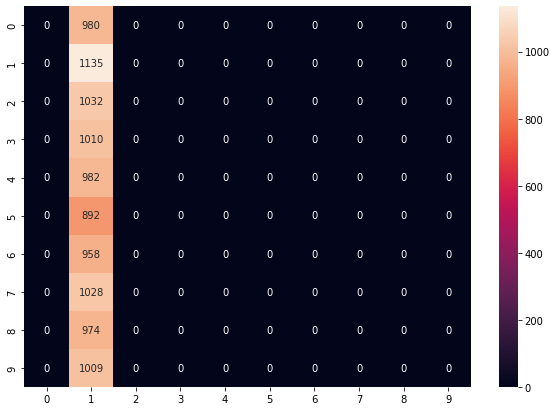

In [25]:
my_svm = SVC(kernel='rbf', C=0.1, gamma='auto')
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(images_test)
performace_measure(labels_test, y_pred)

##### SVM with rbf kernel, C = 3, gamma = auto

Accuracy: 0.1135
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000

Precision: 0.91135
Recall: 0.1
F1 score: 0.0203861697350696


/Users/chief-blackhood/virtualenv/SMAI/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chief-blackhood/virtualenv/SMAI/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chief-blackhood/virtualenv/SMAI/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

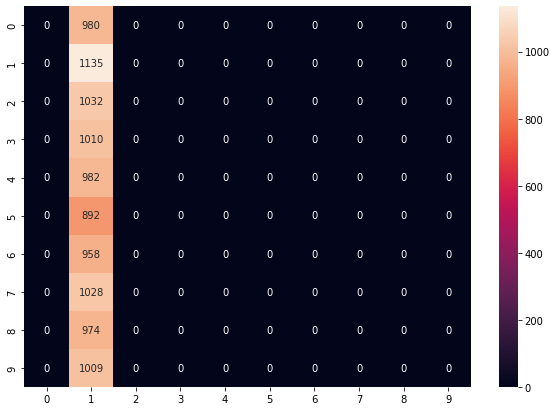

In [19]:
my_svm = SVC(kernel='rbf', C=3, gamma='auto')
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(images_test)
performace_measure(labels_test, y_pred)

##### SVM with rbf kernel, C = 10, gamma = auto

Accuracy: 0.1135
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000

Precision: 0.91135
Recall: 0.1
F1 score: 0.0203861697350696


/Users/chief-blackhood/virtualenv/SMAI/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chief-blackhood/virtualenv/SMAI/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chief-blackhood/virtualenv/SMAI/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

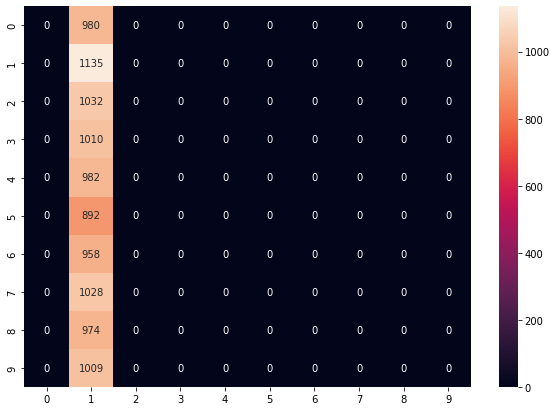

In [20]:
my_svm = SVC(kernel='rbf', C=10, gamma='auto')
my_svm.fit(X_train, y_train)
y_pred = my_svm.predict(images_test)
performace_measure(labels_test, y_pred)

We can observe that SVM with rbf kernel, C = 3, gamma = scale performs the best with an accuracy of 96.35%. Also, gamma at 'auto' only predicts 1 and therefore don't have a good accuracy.